In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

In [2]:
#z_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

# Understanding hypothesis testing....

Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \Rightarrow >, <, \neq  $  
Null Hypothesis (Status Quo): $ H_0 \Rightarrow \leq, \geq, = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept H_1 \ or \ Reject H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept H_1 \ or \ Reject H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept H_1 \ or \ Reject H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept H_1 \ or \ Reject H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept H_1 \ or \ Reject H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept H_1 \ or \ Reject H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

# question 1) 
## Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? 

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \mu \neq 500 $$
Null Hypothesis (Status Quo): $$ H_0: \mu = 500 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} = 465.3 $$

Step - 3:
Compute Test Statistic: $$ t-score= \frac{\bar{x} - \mu}{S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ = 0.05

Step-5:
calculate degrees of freedom   
$ n-1=10-1=9 $

Step-6: 
state decision rule( if t_critical is less than tscore or greater than t-score )

Step-7:
conclusion ( either accepting or rejecting null hypothesis)




In [3]:
l = [490,220,470,500,495,496,496,498,508,480]

mean=sum(l)/len(l)
mean

465.3

# calculating sample standard deviation



In [4]:
import math
length=len(l)

In [5]:
def stand_dev(values):
    total_sum=0
    for i in range(length):
        total_sum +=(values[i]-mean)**2
        under_root=(total_sum)/(length-1)
    return math.sqrt(under_root)
        

In [6]:
sample_std_dev=stand_dev(l)
print(" the sample standard deviation    S={}".format(sample_std_dev))

 the sample standard deviation    S=86.84859110991827


In [8]:
# two_tail calculating t-critical value:

from scipy.stats import t
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)   # degree of freedom (df)=9

print(t_critical)

2.2621571627409915


In [9]:
# collected parameters are:
sample_size=10
sample_mean=465.3
pop_mean=500
sample_std=86.85

In [10]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-1.2634546322146545


In [11]:
# Conclusion using t-test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Text(465.3, 0.0007, 'x_bar')

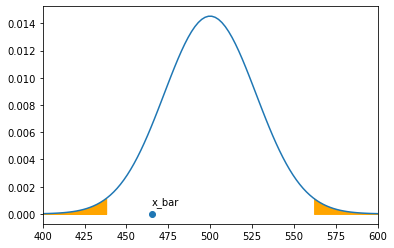

In [12]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))





# Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?


Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \mu > 4 $$
Null Hypothesis (Status Quo): $$ H_0: \mu \leq 4 $$

Step - 2:  
* Collect a sample of size n = 20 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} = 4.25 $$

Step - 3:
Compute Test Statistic: $$ t-score = \frac{\bar{x} - \mu}{\S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha $ =1-0.95=0.05

Step - 5.1: Right tailed t-test: $$ reject H_0 if t-score > t-critical ? $$

Step - 5.2:
calculate degrees of freedom   
$ n-1=20-1=19 $

Step-6: 
state decision rule( if t_critical is less than tscore or greater than t-score ,will reject the null hypothesis

Step-7:
conclusion ( either accepting or rejecting null hypothesis)



In [24]:
l2=[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
print(sum(l2)/len(l2))

4.25


In [35]:
sample_mean2=4.25

In [36]:
length2=len(l2)

In [38]:
def stand_dev(values):
    total_sum=0
    for i in range(length2):
        total_sum +=(values[i]-sample_mean2)**2
        under_root=(total_sum)/(length2-1)
    return math.sqrt(under_root)
        

In [39]:
sample_std_dev2=stand_dev(l2)
print(" the sample standard deviation    S={}".format(sample_std_dev2))

 the sample standard deviation    S=0.8506963092234007


In [33]:
from scipy.stats import t

In [45]:
# One tail (calculating t-critical)

alpha = 1 - 0.95

t_critical= t.ppf(1-alpha, df = 19)

print(t_critical2)

1.729132811521367


In [48]:
# collected parameters are:
sample_size=20
sample_mean=4.25
pop_mean=4
sample_std=0.85069

In [50]:
# Calculating the t-score

t2= t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t2)

1.3142672286613162


In [51]:
# Conclusion using t-test

if(np.abs(t2) > t_critical2):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Text(4.25, 0.1, 'x_bar')

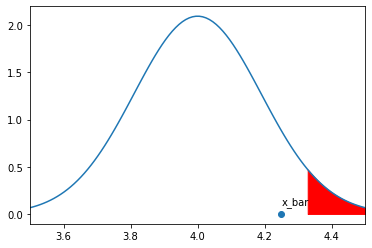

In [53]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical2 * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean does not fall on rejection region
# i.e. Fail to Reject the Null Hypothesis

# Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?


Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \mu >15? $$
Null Hypothesis (Status Quo): $$ H_0:   \mu \leq 15 ? $$

Step - 2:  
* Collect a sample of size n = 20 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} = 15.1 $$

Step - 3:
Compute Test Statistic: $$ t-score= \frac{\bar{x} - \mu}{\S/\sqrt[2]{n}}$$

Step - 4:
Decide $ \alpha=1-0.95=0.05 $

Step - 5.2: calculate degrees of freedom
𝑛−1=20−1=19 

Step-6: state decision rule( if t_critical is less than tscore or greater than t-score)

Step-7: conclusion ( either accepting or rejecting null hypothesis)

In [62]:
l=[14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sample_mean=sum(l)/len(l)

In [63]:
sample_mean

15.098999999999998

In [64]:
length=len(l)

In [65]:
def stand_dev(values):
    total_sum=0
    for i in range(length):
        total_sum +=(values[i]-sample_mean)**2
        under_root=(total_sum)/(length-1)
    return math.sqrt(under_root)

In [67]:
sample_std=stand_dev(l)
print(" the sample standard deviation    S={}".format(sample_std))

 the sample standard deviation    S=1.0253671999517255


In [68]:
from scipy.stats import t

In [69]:
#  right One tail (calculating t-critical)

alpha = 1 - 0.95

t_critical= t.ppf(1-alpha, df = 19)

print(t_critical2)

1.729132811521367


In [70]:
# collected parameters are:
sample_size=20
sample_mean=15.1
pop_mean=15
sample_std=1.025

In [72]:
# Calculating the t-score

t= t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t2)

0.4363059468292258


In [73]:
# Conclusion using t-test

if(np.abs(t2) > t_critical2):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Text(15.1, 0.1, 'x_bar')

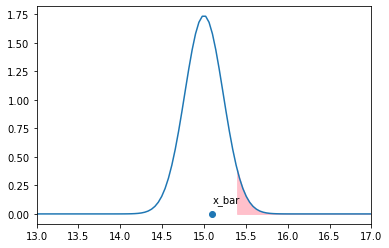

In [74]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='pink')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean does not fall on rejection region
# i.e. Fail to Reject the Null Hypothesis

 # Q-4) You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?  (take sample std dev=7)

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \mu <100 ? $$
Null Hypothesis (Status Quo): $$ H_0: \geq 100 $$

Step - 2:  
*  n = 100
* Compute sample mean $$ \bar{x} = 97.5 $$

Step - 3:
Compute Test Statistic: $$ t-score= \frac{\bar{x} - \mu}{\S/\sqrt[2]{n}}$$   # S=7

Step - 4:
Decide $ \alpha $ = 1-0.95=0.05

Step - 5.2: calculate degrees of freedom
𝑛−1=100−1=99 

Step-6: state decision rule( if t_critical is less than tscore or greater than t-score)

Step-7: conclusion ( either accepting or rejecting null hypothesis)


In [79]:
from scipy.stats import t

In [80]:
sample_mean=97.5
sample_std=7
pop_mean=100
sample_size=100

In [81]:
 #left One tail (calculating t-critical)

alpha = 1 - 0.95

t_critical= t.ppf(1-alpha, df = 99)

print(t_critical)

1.6603911559963895


In [82]:
# Calculating the t-score

t= t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-3.5714285714285716


In [83]:
# Conclusion using t-test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


Text(97.5, 0.02, 'x_bar')

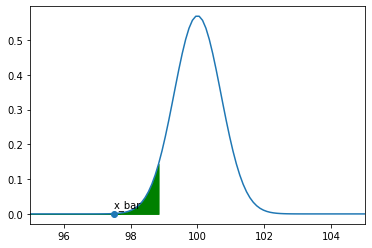

In [84]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

In [ ]:
# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis